Dataset - https://drive.google.com/file/d/1ONUb5GOpQULDizf80tS4kexSucWVcXvj/view?usp=sharing

**1. Import Libraries and Dataset**

In [1]:
# Import all the packages that are required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import seaborn as sns
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import io
from scipy import stats
%matplotlib inline

In [2]:
# Importing the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['onlineuseradvertisement.csv']))

Saving onlineuseradvertisement.csv to onlineuseradvertisement.csv


**2. Data Visualisation and Exploration**

In [3]:
# Check the size of the dataset
df.shape

(2000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   Income                  2000 non-null   int64  
 4   Location                2000 non-null   object 
 5   Device                  2000 non-null   object 
 6   Interest_Category       2000 non-null   object 
 7   Time_Spent_on_Site      2000 non-null   float64
 8   Number_of_Pages_Viewed  2000 non-null   int64  
 9   Click                   2000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [5]:
# View the first five rows of the dataset
df.head()

,Unnamed: 0,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,0,56,Male,99003,Rural,Mobile,Sports,81.979324,7,0
1,1,46,Male,72395,Suburban,Tablet,Sports,59.854070,3,1
2,2,32,Male,59758,Suburban,Tablet,Sports,78.861989,2,0
3,3,60,Male,74312,Urban,Tablet,Technology,9.411579,6,0
4,4,25,Female,88670,Suburban,Mobile,Fashion,76.468409,9,0


In [6]:
# Describing and visualizing the dataset
df.describe()

,Unnamed: 0,Age,Income,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.31650,59652.978500,61.113314,10.321500,0.497000
std,577.494589,13.46566,23070.443915,32.518823,5.476507,0.500116
min,0.000000,18.00000,20112.000000,5.006075,1.000000,0.000000
25%,499.750000,30.00000,39873.750000,33.947635,6.000000,0.000000
50%,999.500000,42.00000,59050.500000,60.378894,10.000000,0.000000
75%,1499.250000,53.00000,79547.000000,88.321464,15.000000,1.000000
max,1999.000000,64.00000,99943.000000,119.840992,19.000000,1.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Time_Spent_on_Site'}>],
       [<Axes: title={'center': 'Number_of_Pages_Viewed'}>,
        <Axes: title={'center': 'Click'}>]], dtype=object)

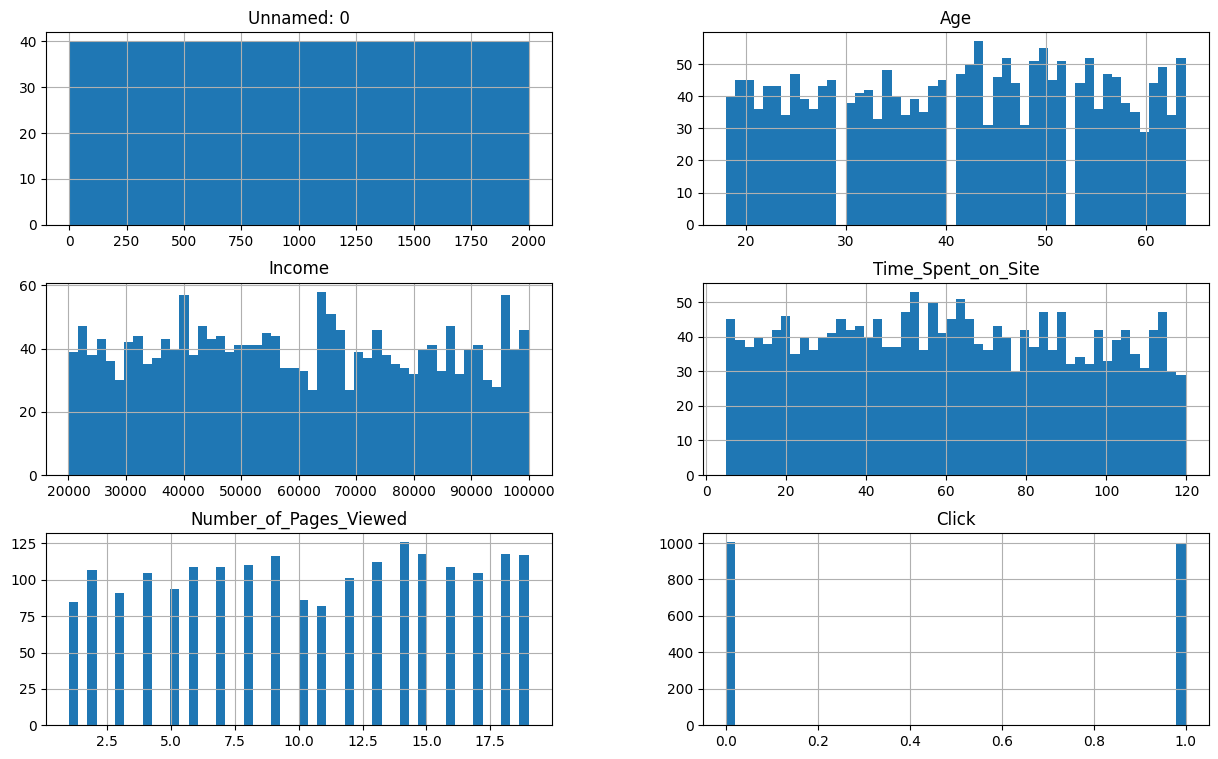

In [7]:
# Plot histograms for all numeric columns
df.hist(figsize=(15,9),bins=50)

**3. Data Pre-processing and cleaning**

In [8]:
# Identify null or missing values
df.isnull().sum()

Unnamed: 0                0
Age                       0
Gender                    0
Income                    0
Location                  0
Device                    0
Interest_Category         0
Time_Spent_on_Site        0
Number_of_Pages_Viewed    0
Click                     0
dtype: int64

In [9]:
df["Click"].value_counts()

0    1006
1     994
Name: Click, dtype: int64

In [10]:
df.Gender = df.Gender.map({"Male":1,"Female":0})
df["Gender"].value_counts()

0    1014
1     986
Name: Gender, dtype: int64

In [11]:
df.Location = df.Location.map({"Rural":0,"Suburban":1,"Urban":2})
df["Location"].value_counts()

1    688
2    659
0    653
Name: Location, dtype: int64

In [12]:
df.Device = df.Device.map({"Mobile":0,"Tablet":1,"Desktop":2})
df["Device"].value_counts()

0    688
1    671
2    641
Name: Device, dtype: int64

In [13]:
df.Interest_Category = df.Interest_Category.map({"Sports":0,"Technology":1,"Fashion":2,"Travel":3})
df["Interest_Category"].value_counts()

1    556
0    495
3    481
2    468
Name: Interest_Category, dtype: int64

In [14]:
# Standardization/Normalization of data
# Age
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age_column = df['Age']
scaled_data = scaler.fit_transform(age_column.values.reshape(-1, 1))
df['Age'] = scaled_data

In [15]:
# Standardization/Normalization of data
# Income
income_column = df["Income"]
scaled_income_data = scaler.fit_transform(income_column.values.reshape(-1, 1))
df["Income"] = scaled_income_data

In [16]:
# Standardization/Normalization of data
# Time Spent on Site
time_spent_on_site_column = df["Time_Spent_on_Site"]
scaled_time_data = scaler.fit_transform(time_spent_on_site_column.values.reshape(-1, 1))
df["Time_Spent_on_Site"] = scaled_time_data

In [17]:
# Standardization/Normalization of data
# Number of pages viewed
pages_viewed_column = df["Number_of_Pages_Viewed"]
scaled_page_data = scaler.fit_transform(pages_viewed_column.values.reshape(-1, 1))
df["Number_of_Pages_Viewed"] = scaled_page_data

**4. Data Preparation**

In [18]:
# Extract features (X) and class labels (Y)
# X = columns from index 1 to 7
X = df.iloc[:,1:8].values
# y = target values, last column
y = df.iloc[:,-1].values

In [19]:
# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**5. Model Building and Performance Evaluation**

***Logistic Regression***

In [20]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print("LR Accuracy = ",metrics.accuracy_score(lr_prediction,y_test))

LR Accuracy =  0.46166666666666667


In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, lr_prediction)
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[166 127]
 [196 111]]


In [22]:
# Classification Report - precision, recall

from sklearn.metrics import classification_report

print('Classification Report: ')
print(classification_report(y_test, lr_prediction))

Classification Report: 
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       293
           1       0.47      0.36      0.41       307

    accuracy                           0.46       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.46      0.46      0.46       600



Receiver operating characteristic – ROC
analysis

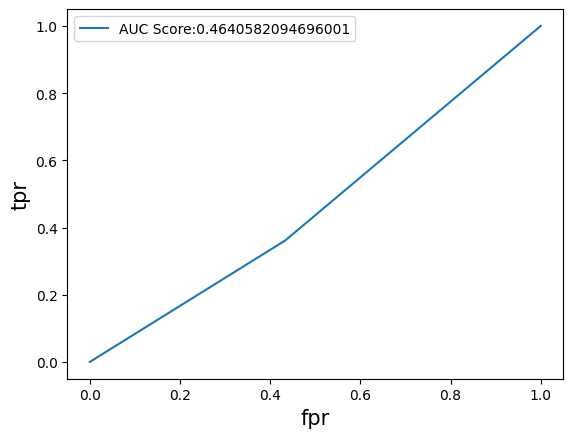

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, ths = roc_curve(y_test, lr_prediction[:])
auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

***Decision Trees***

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy score")
accuracy_score(y_test, y_pred)

Accuracy score


0.49666666666666665

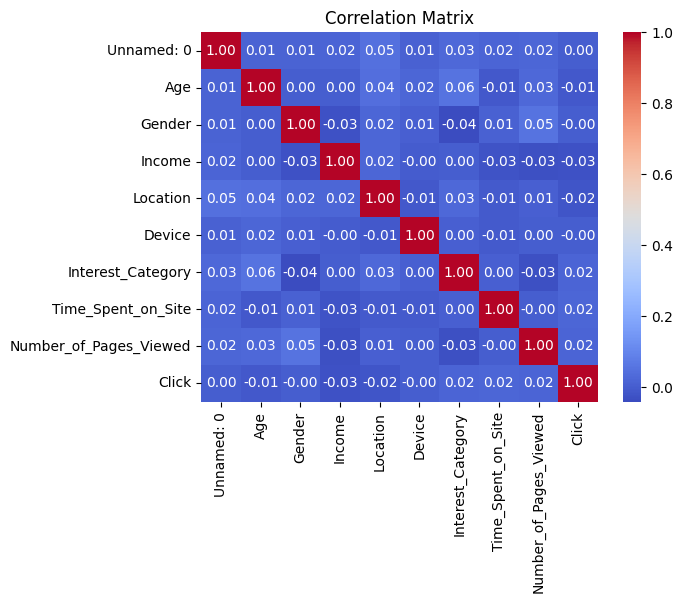

In [25]:
# Corelation matrix
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***K-Nearest Neighbors (K-NN)***

In [26]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy score")
accuracy_score(y_test, y_pred)

Accuracy score


0.505

***Naive Bayes***

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy score")
accuracy_score(y_test, y_pred)

Accuracy score


0.47

***Random Forest***

In [28]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth = 3)
# Train the model on training data
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5006273306176015


***Adaboost***

In [30]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize AdaBoost classifier (you can also use AdaBoostRegressor for regression problems)
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
# Train the AdaBoost classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47833333333333333


**6. Fine-Tuning Hyperparameters**

***KNN***

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
}

# Initialize KNN classifier
knn = neighbors.KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best KNN model from grid search
best_knn = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.505


***Random Forest***

In [33]:
from sklearn.metrics import mean_squared_error
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the RandomForestRegressor and parameter grid
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best RandomForestRegressor model from grid search
best_rf = grid_search.best_estimator_

# Make predictions on the testing data using the best model
predictions = best_rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (MSE): 0.2511192778414913


***Adaboost***

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm for boosting
}

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV with the AdaBoost classifier and parameter grid
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best AdaBoost classifier model from grid search
best_adaboost_clf = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}
Accuracy: 0.49


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# List of classifiers
classifiers = [best_knn,  best_adaboost_clf]
classifier_names = ['K-NN',  'Adaboost']

for clf, clf_name in zip(classifiers, classifier_names):
    # Make predictions using the optimised parameters
    y_pred = clf.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fscore = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    misclassification_rate = 1 - accuracy

    # Print metrics
    print(f"{clf_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-score: {fscore:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Misclassification Rate: {misclassification_rate:.2f}\n")

K-NN Metrics:
Precision: 0.51
Recall: 0.51
F-score: 0.50
Accuracy: 0.51
Misclassification Rate: 0.49

Adaboost Metrics:
Precision: 0.51
Recall: 0.50
F-score: 0.35
Accuracy: 0.49
Misclassification Rate: 0.51

